# <center> CCT College Dublin </center>

## <center> Assessment Cover Page</center>


<br><br><br>
---

<span style="font-size:larger;">

**Module Title:**&nbsp;&nbsp;&nbsp; Diploma in Predictive Analytics
	
**Assessment Title:**&nbsp;&nbsp;&nbsp;PDA FINAL PROJECT
	
**Lecturer Name:**&nbsp;&nbsp;&nbsp; Marina Iantorno
	
**Student Full Name:**&nbsp;&nbsp;&nbsp;Yumiko Maria Bejarano Azogue 
	
**Student Number:**&nbsp;&nbsp;&nbsp; 2024144
	
**Assessment Due Date:**&nbsp;&nbsp;&nbsp; 08/07/2024
	
**Date of Submission:**&nbsp;&nbsp;&nbsp; 14/08/2024
    
</span> 

<br><br><br>

---

#### Declaration 

```
By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.
```
<br><br><br>

--- 

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the data file
dataset = pd.read_csv('OnlineNewsPopularity.csv', nrows=10000)

In [3]:
dataset.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
# Data Cleaning and Preparation
new_dataset = dataset.copy()

In [5]:
# Remove leading and trailing spaces
new_dataset.columns = new_dataset.columns.str.strip()  

In [6]:
# Drop non-predictive columns
new_dataset = new_dataset.drop(columns=['url', 'timedelta'])

In [7]:
# Check for missing values
print("\nChecking for missing values:")
print(new_dataset.isnull().sum())


Checking for missing values:
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares

In [8]:
# Exploratory Data Analysis (EDA)
print("\nDescriptive statistics of the dataset:")
print(new_dataset.describe().T)


Descriptive statistics of the dataset:
                                 count           mean            std  \
n_tokens_title                 10000.0       9.761400       1.966534   
n_tokens_content               10000.0     486.745500     409.006459   
n_unique_tokens                10000.0       0.561083       0.119295   
n_non_stop_words               10000.0       0.992200       0.087977   
n_non_stop_unique_tokens       10000.0       0.704208       0.121718   
num_hrefs                      10000.0       9.948400      10.380795   
num_self_hrefs                 10000.0       3.319300       4.408956   
num_imgs                       10000.0       3.487600       7.635226   
num_videos                     10000.0       1.224000       4.387180   
average_token_length           10000.0       4.628228       0.495441   
num_keywords                   10000.0       7.121400       1.877076   
data_channel_is_lifestyle      10000.0       0.072600       0.259492   
data_channel_is_entertai

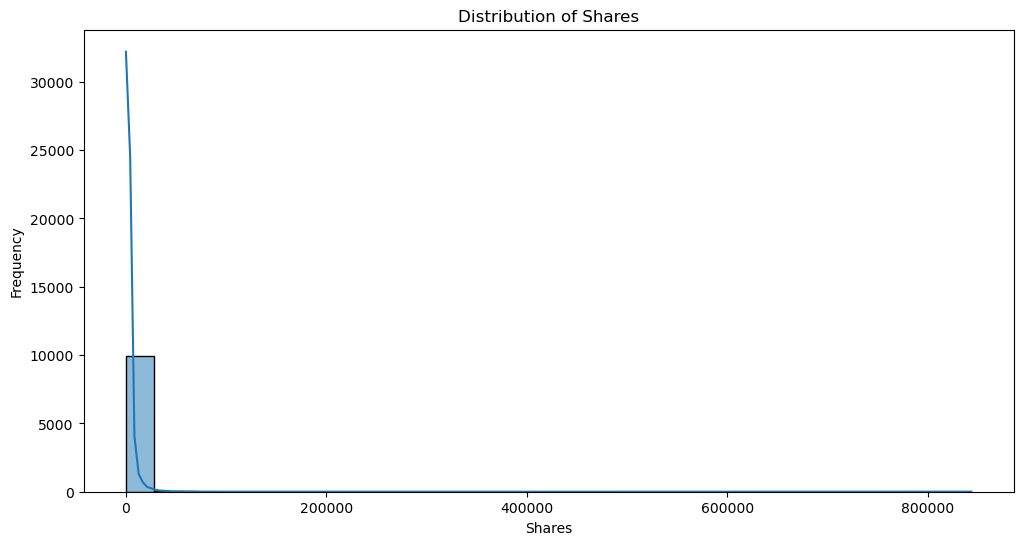

In [9]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(new_dataset['shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

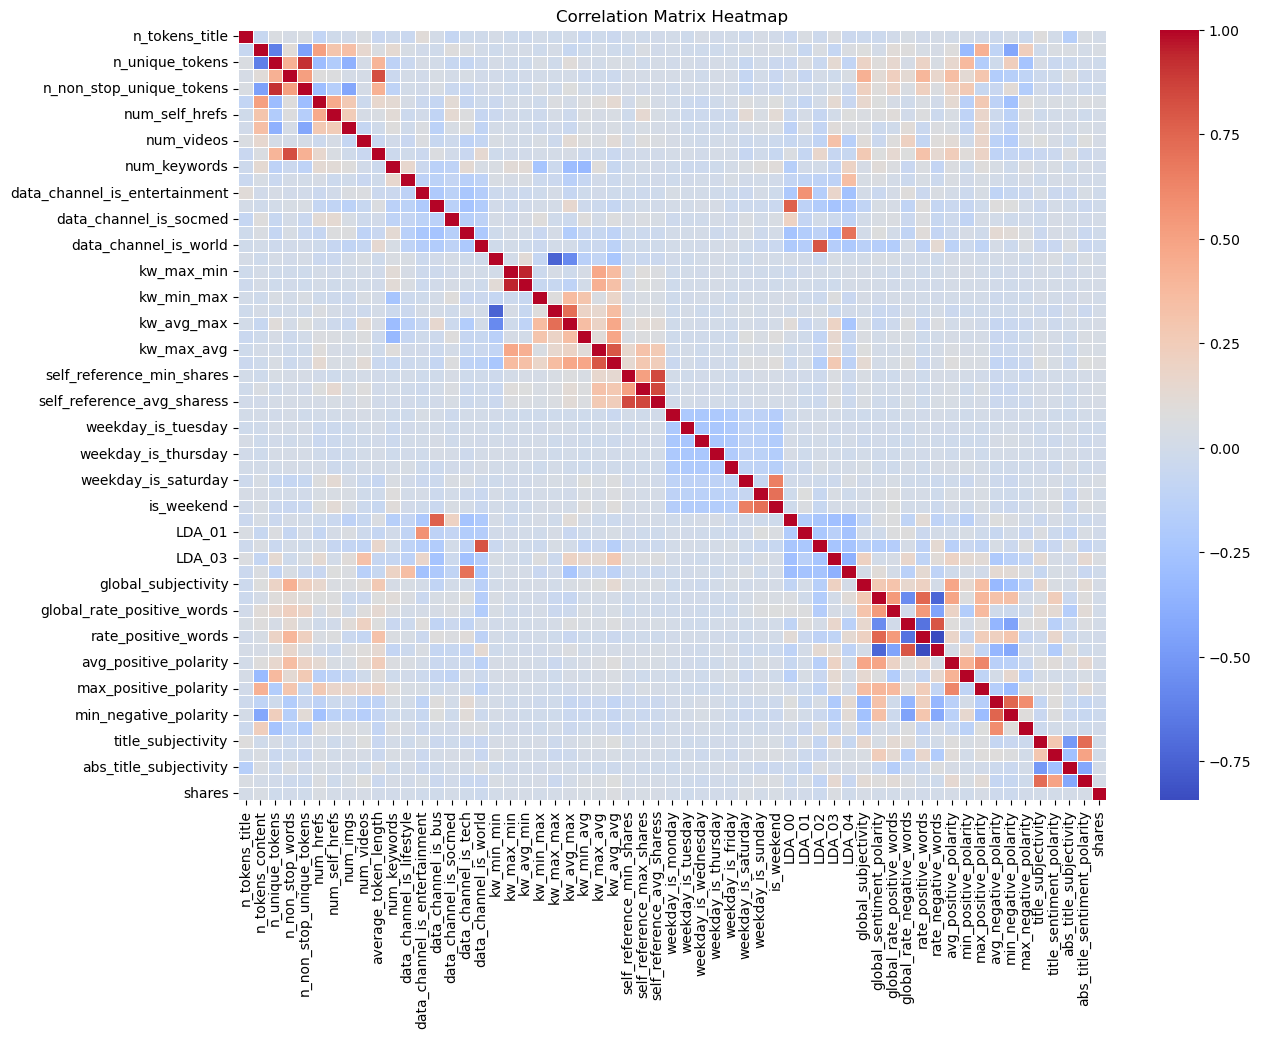

In [10]:
# Correlation Matrix
plt.figure(figsize=(14, 10))
correlation_matrix = new_dataset.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
# Create popularity categories based on shares
share_data = new_dataset['shares']

# Define share ranges and their corresponding popularity grades
def determine_popularity(share):
    if share <= 861:
        return 1
    elif share <= 1400:
        return 2
    elif share <= 31300:
        return 3
    elif share <= 53700:
        return 4
    elif share <= 77200:
        return 5
    else:
        return 6

# Apply the function to create the popularity column
new_dataset['popularity'] = share_data.apply(determine_popularity)


In [12]:
# Check the dataset after adding the 'popularity' column
print("\nDataset after adding 'popularity' column:")
print(new_dataset.head())



Dataset after adding 'popularity' column:
   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  m

In [13]:
# Exploratory Data Analysis (EDA)
print("\nDescriptive statistics of the dataset:")
print(new_dataset.describe().T)


Descriptive statistics of the dataset:
                                 count           mean            std  \
n_tokens_title                 10000.0       9.761400       1.966534   
n_tokens_content               10000.0     486.745500     409.006459   
n_unique_tokens                10000.0       0.561083       0.119295   
n_non_stop_words               10000.0       0.992200       0.087977   
n_non_stop_unique_tokens       10000.0       0.704208       0.121718   
num_hrefs                      10000.0       9.948400      10.380795   
num_self_hrefs                 10000.0       3.319300       4.408956   
num_imgs                       10000.0       3.487600       7.635226   
num_videos                     10000.0       1.224000       4.387180   
average_token_length           10000.0       4.628228       0.495441   
num_keywords                   10000.0       7.121400       1.877076   
data_channel_is_lifestyle      10000.0       0.072600       0.259492   
data_channel_is_entertai

In [14]:
# Prepare features and target
X = new_dataset.drop('popularity', axis=1).values
y = new_dataset['popularity'].values

In [15]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [16]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Regressor': SVR()
}

In [18]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")

Linear Regression - MSE: 0.53, R2: 0.18
Random Forest - MSE: 0.00, R2: 1.00
Decision Tree - MSE: 0.00, R2: 1.00
K-Nearest Neighbors - MSE: 0.65, R2: -0.01
Support Vector Regressor - MSE: 0.49, R2: 0.23


In [19]:
# Select the best model based on R2 score
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Decision Tree


In [20]:
# Creating a DataFrame for the new program
# Define the new program DataFrame with the given data
new_program = pd.DataFrame({
    'n_tokens_title': [12.0],
    'n_tokens_content': [219.0],
    'n_unique_tokens': [0.663594],
    'n_non_stop_words': [1.0],
    'n_non_stop_unique_tokens': [0.815385],
    'num_hrefs': [4.0],
    'num_self_hrefs': [2.0],
    'num_imgs': [1.0],
    'num_videos': [0.0],
    'average_token_length': [4.680365],
    'num_keywords': [15.0],  
    'data_channel_is_lifestyle': [1.0], 
    'data_channel_is_entertainment': [0.0],
    'data_channel_is_bus': [0.0],
    'data_channel_is_socmed': [0.0],
    'data_channel_is_tech': [0.0],
    'data_channel_is_world': [0.0],
    'kw_min_min': [200.0],
    'kw_max_min': [500.0],
    'kw_avg_min': [500.0],
    'kw_min_max': [5000.0],
    'kw_max_max': [100000.0],
    'kw_avg_max': [100000.0],
    'kw_min_avg': [2000.0],
    'kw_max_avg': [5000.0],
    'kw_avg_avg': [5000.0],
    'self_reference_min_shares': [1000],
    'self_reference_max_shares': [2000],
    'self_reference_avg_sharess': [1500],
    'weekday_is_monday': [0.0],
    'weekday_is_tuesday': [0.0],
    'weekday_is_wednesday': [0.0],
    'weekday_is_thursday': [0.0],
    'weekday_is_friday': [0.0],
    'weekday_is_saturday': [1.0],
    'weekday_is_sunday': [1.0],
    'is_weekend': [1.0],  # Adjusted based on the weekday_is_saturday value
    'LDA_00': [0.2],
    'LDA_01': [0.15],
    'LDA_02': [0.2],
    'LDA_03': [0.25],
    'LDA_04': [0.3],
    'global_subjectivity': [0.45],
    'global_sentiment_polarity': [0.14],
    'global_rate_positive_words': [0.05],
    'global_rate_negative_words': [0.02],
    'rate_positive_words': [0.7],
    'rate_negative_words': [0.27],
    'avg_positive_polarity': [0.36],
    'min_positive_polarity': [0.1],
    'max_positive_polarity': [0.77],
    'avg_negative_polarity': [-0.25],
    'min_negative_polarity': [-0.49],
    'max_negative_polarity': [-0.11],
    'title_subjectivity': [0.27],
    'title_sentiment_polarity': [0.08],
    'abs_title_subjectivity': [0.35],
    'abs_title_sentiment_polarity': [0.15],
    'shares': [2000]
})


In [21]:
# Feature scaling for new_program
new_program_scaled = scaler.transform(new_program)

In [22]:
# Predicting popularity for new_program
predicted_popularity = model.predict(new_program_scaled)
print(f"Predicted New_Popularity: {predicted_popularity[0]:.2f}")

Predicted New_Popularity: 2.77


In [23]:
def classify_popularity(predicted_value):
    if predicted_value <= 1.5:
        return 'Very Poor'
    elif predicted_value <= 2.5:
        return 'Poor'
    elif predicted_value <= 3.5:
        return 'Average'
    elif predicted_value <= 4.5:
        return 'Good'
    elif predicted_value <= 5.5:
        return 'Very Good'
    else:
        return 'Excellent'


In [24]:
popularity_category = classify_popularity(predicted_popularity)
print(f"Predicted Popularity: {popularity_category}")

Predicted Popularity: Average
